# Portfolio Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('small_portfolio.csv')
df.head()

,date,GE,JPM,MSFT,PG
0,2015-01-02,25.06,62.49,46.760,90.44
1,2015-01-05,24.60,60.55,46.325,90.01
2,2015-01-06,24.07,58.98,45.650,89.60
3,2015-01-07,24.08,59.07,46.230,90.07
4,2015-01-08,24.37,60.39,47.590,91.10


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'], inplace = True)
df.tail()

,GE,JPM,MSFT,PG
date,,,,
2018-03-21,13.88,114.74,92.48,77.04
2018-03-22,13.35,109.95,89.79,76.41
2018-03-23,13.07,107.01,87.18,75.91
2018-03-26,12.89,110.31,93.78,76.41
2018-03-27,13.44,108.17,89.47,77.79


# Calculating returns from pricing data

In [5]:
# Calculate returns over each day
returns = df.pct_change()
returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


# Calculate individual mean returns 

In [6]:
# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

-1.6782226618545547e-05


# Calculating cumulative returns

In [7]:
# Calculate daily portfolio returns
returns['Portfolio']= returns.dot(weights)
returns.head()

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755,-0.017723
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555,-0.019328
2015-01-07,0.000415,0.001526,0.012705,0.005246,0.003579
2015-01-08,0.012043,0.022346,0.029418,0.011436,0.017518


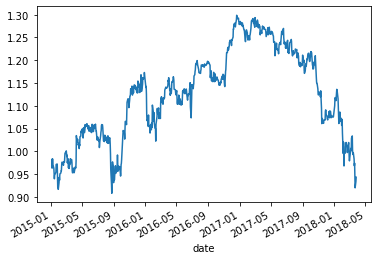

In [8]:
# Compound the percentage returns over time
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.Portfolio.plot()

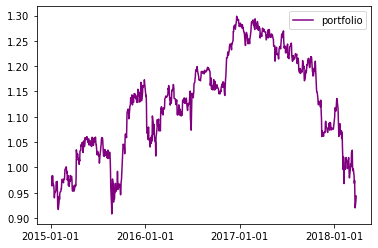

In [9]:
from matplotlib import dates
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(dates.YearLocator())
plt.legend()
plt.show()

# Measuring risk of a portfolio

## Portfolio variance in python

In [10]:
# Calculate daily returns from prices
daily_returns = df.pct_change()
# Construct a covariance matrix for the daily returns data
cov_matrix_d = daily_returns.cov()
# Construct a covariance matrix from the daily_returns
cov_matrix_d = (daily_returns.cov())*250
print (cov_matrix_d)

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


In [11]:
# Calculate the variance with the formula
weights = np.array([0.25, 0.25, 0.25, 0.2])
port_variance = np.dot(weights.T, np.dot(cov_matrix_d, weights))
print (port_variance)
# Just converting the variance float into a percentage
print(str(np.round(port_variance, 3) * 100) + '%')
port_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_d, weights)))
print(str(np.round(port_stddev, 3) * 100) + '%')

0.021406264069913018
2.1%
14.6%


# Annualized returns 

In [12]:
# Check the start and end of timeseries
MSFT_price=df[['MSFT']]
MSFT_price.head(1)

,MSFT
date,
2015-01-02,46.76


In [13]:
MSFT_price.tail(1)

,MSFT
date,
2018-03-27,89.47


In [14]:
# Assign the number of months
months = 38

In [15]:
MSFT_price.iloc[0]

MSFT    46.76
Name: 2015-01-02 00:00:00, dtype: float64

In [16]:
# Calculate the total return
total_return = (MSFT_price.iloc[-1] - MSFT_price.iloc[0]) /MSFT_price.iloc[0]
print (total_return)

MSFT    0.913388
dtype: float64


In [17]:
# Calculate the annualized returns over months
annualized_return=((1 + total_return)**(12/months))-1
print (annualized_return)

MSFT    0.227412
dtype: float64


In [18]:
# Select three year period
MSFT_price = MSFT_price['2015-01-01':'2017-12-31']
MSFT_price.tail(3)

,MSFT
date,
2017-12-27,85.71
2017-12-28,85.72
2017-12-29,85.54


In [19]:
MSFT_price.head(3)

,MSFT
date,
2015-01-02,46.760
2015-01-05,46.325
2015-01-06,45.650


In [20]:
# Calculate annualized return over 3 years
annualized_return = ((1 + total_return)**(1/3))-1
print (annualized_return)

MSFT    0.241465
dtype: float64


# Calculating the Sharpe Ratio

In [21]:
# Calculate the annualized standard deviation
MSFT_returns = MSFT_price.pct_change()
annualized_vol = MSFT_returns.std()*np.sqrt(250)
print (annualized_vol)

MSFT    0.225173
dtype: float64


In [22]:
# Define the risk free rate
risk_free = 0.01
# Calcuate the sharpe ratio
sharpe_ratio = (annualized_return - risk_free) / annualized_vol
print (sharpe_ratio)

MSFT    1.027942
dtype: float64


# Calculating skewness and kurtosis

mean :  MSFT    0.000903
dtype: float64
vol :  MSFT    0.014241
dtype: float64
skew :  MSFT    0.541799
dtype: float64
kurt :  MSFT    11.106312
dtype: float64


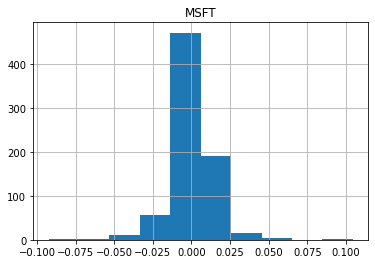

In [23]:
MSFT_returns.hist()
print("mean : ", MSFT_returns.mean())
print("vol : ", MSFT_returns.std())
print("skew : ", MSFT_returns.skew())
print("kurt : ", MSFT_returns.kurtosis())

# Sortino ratio

In [24]:
# Define risk free rate and target return of 0
rfr = 0
target_return = 0
# Select the negative returns only
negative_returns = MSFT_returns.loc[MSFT_returns.MSFT< target_return]
negative_returns.head()

,MSFT
date,
2015-01-05,-0.009303
2015-01-06,-0.014571
2015-01-09,-0.008405
2015-01-12,-0.012503
2015-01-13,-0.005258


In [25]:
# Calculate expected return and std dev of downside returns
expected_return = MSFT_returns['MSFT'].mean()
down_stdev = negative_returns.std()
# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev
print(sortino_ratio)

MSFT    0.088182
dtype: float64


# Maximum daily draw-down

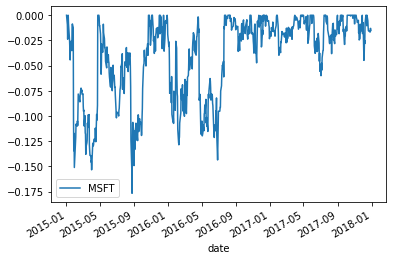

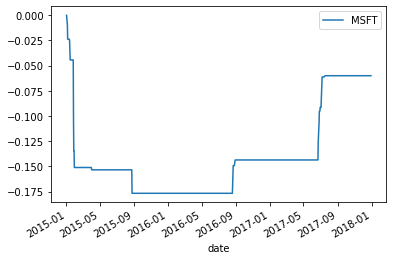

In [26]:
# Calculate the maximum value of returns using rolling().max()
roll_max = MSFT_price.rolling(min_periods=1,window=250).max()
# Calculate daily draw-down from rolling max
daily_drawdown = MSFT_price/roll_max - 1.0
# Calculate maximum daily draw-down
max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=250).min()
# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

# Performance Attribution
Investment factors and how they play a role in driving risk and return

In [27]:
# Comparing against a benchmark
portfolio_data=pd.read_csv('large_pf.csv', index_col=0)
portfolio_data.head()

,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


### Active return

In [28]:
# Calculate mean portfolio return
total_return_pf = (portfolio_data.pf_weights*portfolio_data.mean_return).sum()

# Calculate mean benchmark return
total_return_bm = (portfolio_data.bm_weights*portfolio_data.mean_return).sum()

# Calculate active return
active_return = total_return_pf - total_return_bm
print ("Simple active return: ", active_return)

Simple active return:  22.576383759900615


### Active weights

In [29]:
# Group dataframe by GICS sectors
grouped_df=portfolio_data.groupby('GICS Sector').sum()

# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']

print (grouped_df['active_weight'])

GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


### Risk factors

In [30]:
df=pd.read_csv('pf_factors.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'], inplace = True)
df.head(1)


,S&P500,WML,value_factor,portfolio
date,,,,
2016-01-04,-1.530373,-1.69,-1.53,-1.651745


In [31]:
df.corr()

,S&P500,WML,value_factor,portfolio
S&P500,1.000000,-0.389313,0.981045,0.751926
WML,-0.389313,1.000000,-0.363237,0.001012
value_factor,0.981045,-0.363237,1.000000,0.767663
portfolio,0.751926,0.001012,0.767663,1.000000


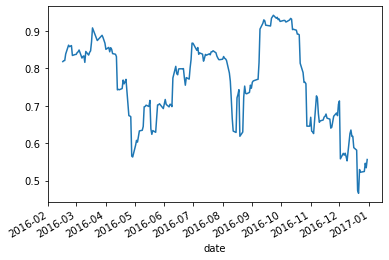

In [32]:
# Rolling correlation
df['corr']=df['portfolio'].rolling(30).corr(df['value_factor'])
# Plot results
df['corr'].plot()

### Factor models
#### Regression model

In [33]:
df.columns

Index(['S&P500', 'WML', 'value_factor', 'portfolio', 'corr'], dtype='object')

In [34]:
import statsmodels.api as sm
# Define the model
model = sm.OLS(df['S&P500'],df[['WML','value_factor']]).fit()

C:\Users\chunx\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [35]:
# Get the model predictions
predictions = model.predict(df[['WML','value_factor']])

In [36]:
b1, b2 = model.params
# Print the coefficients
print ('Sensitivities of active returns to factors: \nb1: %f\nb2: %f' % (b1, b2))

Sensitivities of active returns to factors: 
b1: -0.038111
b2: 0.985926


In [37]:
# Print out the summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 S&P500   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3322.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):                   8.59e-181
Time:                        15:07:50   Log-Likelihood:                          109.08
No. Observations:                 252   AIC:                                     -214.2
Df Residuals:                     250   BIC:                                     -207.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
WML             -0.0381      0.013     -2.896      0.004      -0.064      -0.012
value_factor     0.9859      0.013     74.741      0.000       0.960       1.012
==============================================================================
Omnibus:                       10.373   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.450
Skew:                           0.292   Prob(JB):                     0.000728
Kurtosis:                       4.017   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Get just beta coefficients from linear regression model

#b1, b2 = sm.OLS(df['returns'], df[['F1', 'F2']]).fit().params
# Print the coefficients
print ('Sensitivities of active returns to factors: \nF1: %f\nF2: %f' % (b1, b2))

Sensitivities of active returns to factors: 
F1: -0.038111
F2: 0.985926


#### Performance and risk analysis in Pyfolio

In [39]:
# Install the package
#!pip install --user pyfolio
# Import the package
import pyfolio as pf

C:\Users\chunx\AppData\Roaming\Python\Python37\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [40]:
# Read the data as a pandas series
dfr=pd.read_csv('sp500.csv')
dfr.head()
dfr['date'] = pd.to_datetime(dfr['date'], format='%Y-%m-%d')

dfr.set_index(['date'], inplace = True)
returns=dfr.pct_change()

returns=pd.Series(returns['S&P500'].values,index=dfr.index)
returns=returns['2016-01-02': '2019-01-02']


Stress Events,mean,min,max
New Normal,0.03%,-4.10%,4.96%


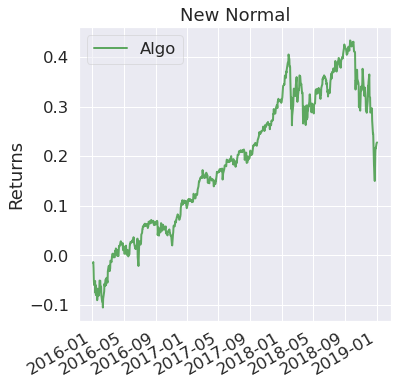

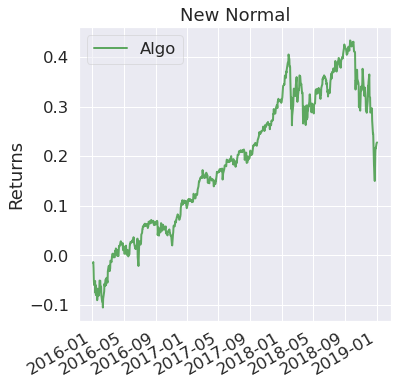

In [41]:
pf.create_interesting_times_tear_sheet(returns, return_fig=True)

pf.create_returns_tear_sheet(returns)

In [ ]:
# Modern portfolio theory

In [43]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
df=pd.read_csv('small_portfolio.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'], inplace = True)
df.tail()

,GE,JPM,MSFT,PG
date,,,,
2018-03-21,13.88,114.74,92.48,77.04
2018-03-22,13.35,109.95,89.79,76.41
2018-03-23,13.07,107.01,87.18,75.91
2018-03-26,12.89,110.31,93.78,76.41
2018-03-27,13.44,108.17,89.47,77.79


In [52]:
# Calculate expected annualized returns and sample covariance
mu = expected_returns.mean_historical_return(df)
Sigma = risk_models.sample_cov(df)

In [53]:
# Obtain the EfficientFrontier
ef = EfficientFrontier(mu, Sigma)


## Maximum Sharpe portfolio

Select an optimal return for a target risk
ef.efficient_risk(2.3)

Select a minimal risk for a target return
ef.efficient_return(1.5)

In [55]:
# Obtain the performance numbers
ef.max_sharpe()
ef.portfolio_performance(verbose=True, risk_free_rate = 0.01)

Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 1.01


(0.2071640257389759, 0.19595169737742765, 1.0061868734885882)

### Minimum Volatility Portfolio

In [57]:
# Calculate the Efficient Frontier with mu and S
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.min_volatility()
# Get interpretable weights and performance numbers
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415861751657277, 0.13292386607830184, -0.3491913312566079)

### Exponentially weighted returns

In [58]:
# Exponentially weighted moving average
mu_ema = expected_returns.ema_historical_return(df,
span=252, frequency=252)
print(mu_ema)

GE     -0.547256
JPM     0.229540
MSFT    0.321329
PG     -0.186417
Name: 2018-03-27 00:00:00, dtype: float64


### Exponentially weighted covariance

In [59]:
from pypfopt import risk_models
# Exponentially weighted covariance
Sigma_ew = risk_models.exp_cov(df, span=180, frequency=252)

### Exponentially weighted covariance

In [60]:
Sigma_semi = risk_models.semicovariance(df,
benchmark=0, frequency=252)
print(Sigma_semi)

            GE       JPM      MSFT        PG
GE    0.018939  0.008505  0.006568  0.004058
JPM   0.008505  0.016797  0.009133  0.004404
MSFT  0.006568  0.009133  0.018711  0.005373
PG    0.004058  0.004404  0.005373  0.008349
